## MNIST example
This is a demo of how to create a simple CNN classifier for the MNIST database. The MNIST dataset contains handwritten digits from 0-9, and the idea is to create a model that will learn to recognize the handwritten digits correctly.

Let's first import the tensorflow library so that we can load in the MNIST dataset, which has already been prepared for us (in real world problems, you'll need to prepare the training and test data yourself).

In [1]:
import tensorflow as tf # import the tensorflow library
mnist = tf.keras.datasets.mnist # load in the MNIST dataset, which consis of images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load in the training and testing data

Then, we'll normalize the pixel values from 0-255 to 0-1, to make model learning easier on TensorFlow. 

In [2]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # normalize pixel values from 0-255 to 0-1 (optional)
x_test = tf.keras.utils.normalize(x_test, axis=1) # normalize pixel values from 0-255 to 0-1 (optional)


I've output the an example of one of the images, a "5"

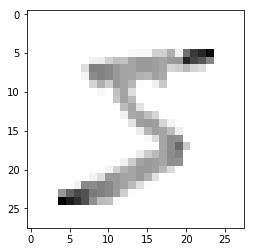

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)

Here's a "0"

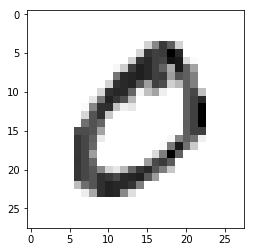

In [6]:
plt.imshow(x_train[1], cmap = plt.cm.binary)

...And a "4"

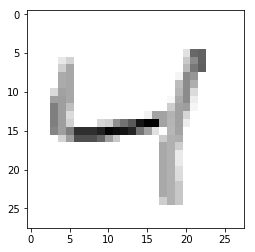

In [7]:
plt.imshow(x_train[2], cmap = plt.cm.binary)

In [8]:

# Define architecture of model
model = tf.keras.models.Sequential() # Sequential is a basic feed forward model
model.add(tf.keras.layers.Flatten()) # turns multi-dimensional array to a 1d array, input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # hidden layer 1 (128 neurons in the layer, rectified linear (default activation function))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # hidden layer 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer, softmax is probability distribution

# Parameters for training of the model
model.compile(optimizer='adam', # adam optimizer is kind of like default (could also use stochastic gradient descent)
             loss='sparse_categorical_crossentropy', # degree of error -- NN doesnt maximize accuracy, but rather minimize loss
             metrics=['accuracy']) # metrics to track

# Train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 71us/step - loss: 0.2602 - acc: 0.9247
Epoch 2/3
60000/60000 [==============================] - 6s 100us/step - loss: 0.1067 - acc: 0.9669
Epoch 3/3
60000/60000 [==============================] - 6s 99us/step - loss: 0.0719 - acc: 0.9779


You'll notice with each epoch, the accuracy goes up and the loss goes down. After just 3 epochs, the accuracy is already at 97.77 percent, which is pretty good. Note this is just in-sample though. Next, we will assess accuracy of the model on data that it hasn't seen yet (the test data set).

In [9]:
# Calculate the validation loss and validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 52us/step
0.09338499597012996 0.9718


The accuracy is still 97.33% which is great (obviously it's going to be a little lower than the in-sample accuracym you should expect this). If there is a huge delta, that means you have overfit. 

Let's take a look at an inidivudal prediction

In [10]:
predictions = model.predict([x_test])

In [11]:
import numpy as np
print(np.argmax(predictions[0]))

7


The first item in the test set is predicted to be a "7" from our model. Looking at the actual image, we can see that it is indeed a 7.

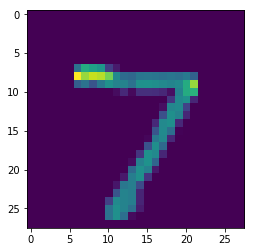

In [13]:
plt.imshow(x_test[0])